This notebook use featexp to do the Feature Enginerring 

github: https://github.com/abhayspawar/featexp 

intro: https://towardsdatascience.com/my-secret-s/brauce-to-be-in-top-2-of-a-kaggle-competition-57cff0677d3c

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from featexp import univariate_plotter
from featexp import get_trend_stats
from featexp import get_univariate_plots

In [2]:
train = pd.read_csv(r'/Users/elziz/Self-Learning/Machine-Learning/Feature Engineering/train.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19483 entries, 0 to 19482
Data columns (total 24 columns):
order_code                19483 non-null int64
order_no                  19483 non-null int64
order_id                  19483 non-null int64
brand_name                19483 non-null object
series_name               19483 non-null object
plate_no                  19483 non-null object
vin                       19483 non-null object
guidance_price            19483 non-null int64
prepaid_rate              19483 non-null float64
finish_time               19483 non-null object
age                       19212 non-null float64
sex                       19212 non-null float64
mile_day_avg_afterpick    18935 non-null float64
mile_sum_afterpick        18935 non-null float64
cn_accident               19483 non-null float64
sum_fixed_amount          19483 non-null float64
installment               19213 non-null float64
break_days_sum            19204 non-null float64
break_count           

### Feature Understanding
- 了解各个数值型features和target的关系
- 了解各个数值型features在相同range范围内的数量 | 如(28,29] (29,30] (30,31]
- target 在Y轴， 该值为target在X轴这个范围内的平均值
- 当target 为 0/1 时仍旧可以一定程度上看出X和Y的关系， 但是当target为多分类时则不太能看

                                           Plots for score                                            


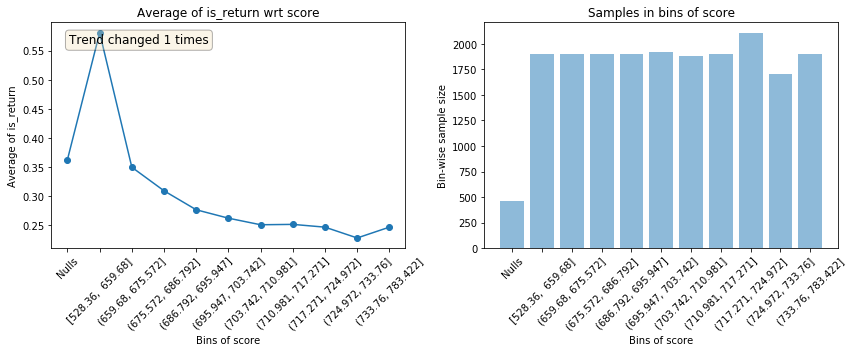

--------------------------------------------------------------------------------------------------------------


                                            Plots for age                                             


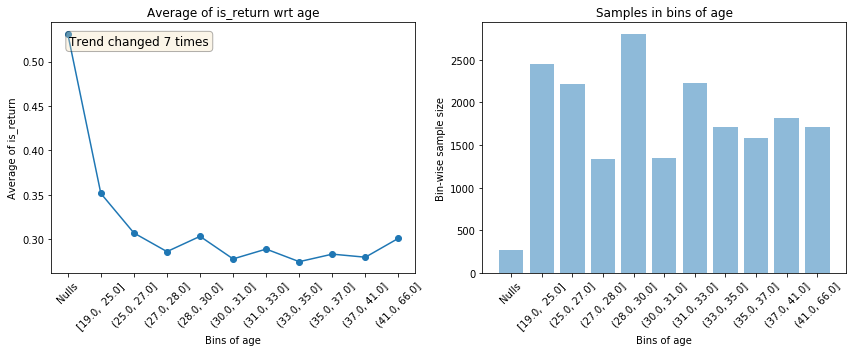

--------------------------------------------------------------------------------------------------------------


brand_name is categorical. Categorical features not supported yet.


In [4]:
get_univariate_plots(data = train, 
                     target_col = 'is_return', 
                     features_list = train[['score', 'age', 'brand_name']])

### Identify Noise Features
- 将train分成两份数据，看各个feature在这两份数据里的表现
- 如果在两份数据里表现一致，则该feature无noise | 反之则反
- 通过 trend_correlation 和 trend_changes 两个维度来看这个feature是否含有noise
- 通过 trend_correlation 和 模型自带的 feature_importance 来选择是否要 drop 掉一些 不重要/noise高 的 feature
- 在官方文档里，使用的是XGboost， 选择了 trend_correlation > 95% + feature_importance > 40 的 | LBScore 提高了 0.002

In [5]:
# Split Data into train1 and train2

X_feature = [f for f in train.columns if f not in ['is_return']]
Y = train['is_return'].copy()
X_train1,X_train2,Y_train1,Y_train2 = train_test_split(train[X_feature], Y
                                                 ,test_size = 0.5, random_state = 101)

train1 = X_train1.copy()
train1['is_return'] = Y_train1

train2 = X_train2.copy()
train2['is_return'] = Y_train2

                                           Plots for score                                            
                                           Train data plots                                           


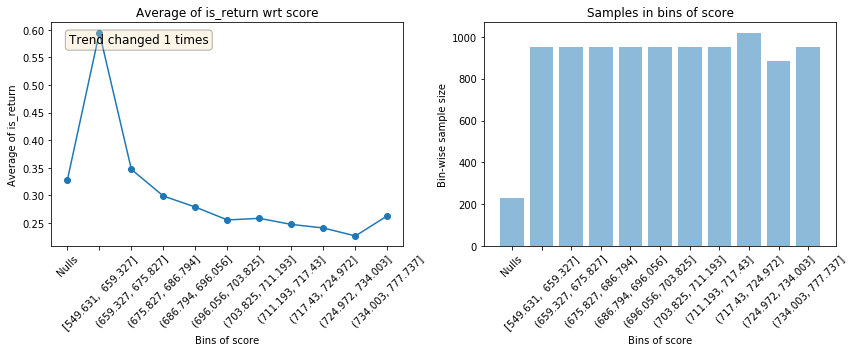

                                           Test data plots                                            


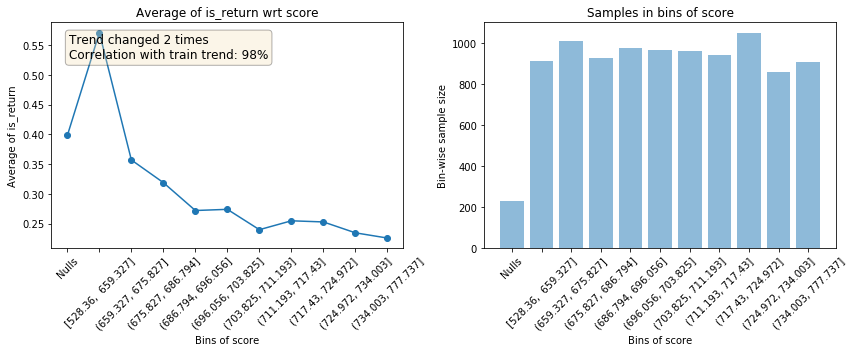

--------------------------------------------------------------------------------------------------------------




In [6]:
# 查看score是否有noise
# grouped_train/ grouped_test 里面包含了score在两个data里面的分布

grouped_train, grouped_test = univariate_plotter(data = train1, 
                                                 target_col = 'is_return',
                                                 feature = 'score',
                                                 data_test = train2)

In [7]:
# Get all numeric features trend_correlation and trend_changes 

stats = get_trend_stats(data=train1, 
                        target_col='is_return', 
                        data_test=train2)
stats

Categorical features ['brand_name', 'series_name', 'plate_no', 'vin', 'finish_time'] ignored. Categorical features not supported yet.
Returning stats for all numeric features


,Feature,Trend_changes,Trend_changes_test,Trend_correlation
0,order_code,3,4,0.855800
1,order_no,1,3,0.994500
2,order_id,1,3,0.994500
3,guidance_price,5,6,0.930278
4,prepaid_rate,1,1,0.949104
5,age,5,5,0.704774
6,sex,0,0,1.000000
7,mile_day_avg_afterpick,4,5,0.832773
8,mile_sum_afterpick,2,2,0.978414
9,cn_accident,2,0,0.913447
